<img align="center" src="../extra/logos/logos.png" width='1200px'>

# Caso de estudio: cambio de uso

## Carga inicial

Este estudio es una adaptación del caso original desarrollado por Digital Earth Australia, que puede ser encontrado [aquí](https://github.com/csiro-easi/eocsi-hackathon-2022/blob/main/case-studies/Change_detection.ipynb).

In [1]:
import datacube
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt
from odc.ui import DcViewer

from datacube.utils import masking
from datacube.utils.rio import configure_s3_access
configure_s3_access(aws_unsigned=False, requester_pays=True)

sys.path.append("../../dea-notebooks/Tools")

from dea_tools.plotting import display_map, rgb

In [2]:
dc = datacube.Datacube(app='SAMSARA') # https://opendatacube.readthedocs.io/en/latest/api/core-classes/datacube.html

In [3]:
buffer = .1

query = {
     "product": "landsat8_c2l2_sr",
     # "product": "s2_l2a",
     "x": -72.9575 + np.array([buffer, -buffer]),
     "y": -39.4054 + np.array([buffer, -buffer]),
     "time": ("2014-01-01", "2022-12-31"),
     "output_crs": "EPSG:32719",
     "resolution": (-30, 30),
     "dask_chunks": {"time": 1, 'x':2048, 'y':2048},
     "group_by": "solar_day"
}

In [4]:
display_map(x=query['x'], y=query['y'])

In [5]:
ds = dc.load(**query)

In [6]:
masking.describe_variable_flags(ds.qa_pixel)

,bits,values,description
snow,5,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
clear,6,"{'0': 'not_clear', '1': 'clear'}",NaN
cloud,3,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
water,7,"{'0': 'land_or_cloud', '1': 'water'}",NaN
cirrus,2,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
nodata,0,"{'0': False, '1': True}",NaN
qa_pixel,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","{'1': 'Fill', '2': 'Dilated Cloud', '4': 'Cirr...",Level 2 pixel quality
cloud_shadow,4,"{'0': 'not_high_confidence', '1': 'high_confid...",NaN
dilated_cloud,1,"{'0': 'not_dilated', '1': 'dilated'}",NaN
cloud_confidence,"[8, 9]","{'0': 'none', '1': 'low', '2': 'medium', '3': ...",NaN


In [7]:
quality_band = 'qa_pixel'
cloud_free_mask = (
    masking.make_mask(ds[quality_band], snow='high_confidence') + 
    masking.make_mask(ds[quality_band], cloud="high_confidence") +
    masking.make_mask(ds[quality_band], cirrus="high_confidence") +
    masking.make_mask(ds[quality_band], cloud_shadow="high_confidence") +
    masking.make_mask(ds[quality_band], nodata=True)
)

In [8]:
dsf = xr.where(cloud_free_mask, np.nan, ds)

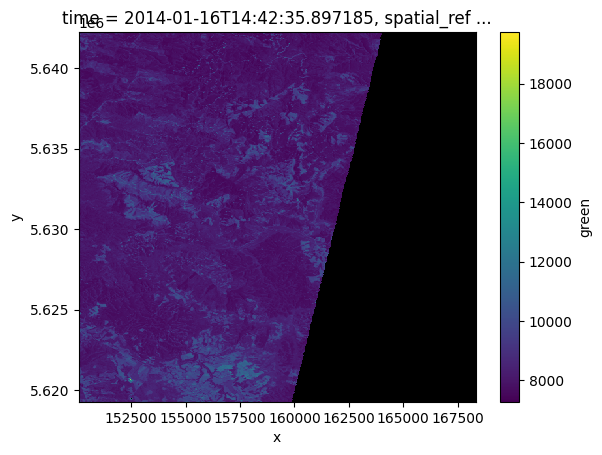

In [9]:
fig, ax = plt.subplots(1, 1)
dsf.green.isel(time=1).plot()
ax.set_facecolor("black")

In [10]:
dsf.update(dsf * 0.0000275 + -0.2)

<xarray.Dataset>
Dimensions:      (time: 356, y: 766, x: 608)
Coordinates:
  * time         (time) datetime64[ns] 2014-01-09T14:36:32.640895 ... 2022-12...
  * y            (y) float64 5.642e+06 5.642e+06 ... 5.619e+06 5.619e+06
  * x            (x) float64 1.501e+05 1.501e+05 ... 1.683e+05 1.683e+05
    spatial_ref  int32 32719
Data variables:
    coastal      (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    blue         (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    green        (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    red          (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    nir08        (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    swir16       (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    swir22       (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    qa_pixel     (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    qa_aerosol   (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>
    qa_radsat    (time, y, x) float64 dask.array<chunksize=(1, 766, 608), meta=np.ndarray>

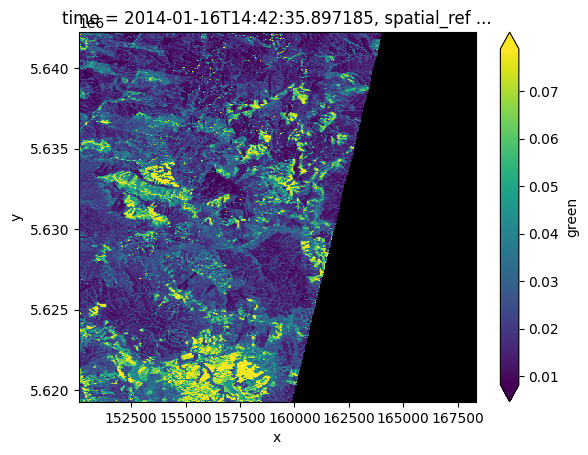

In [11]:
fig, ax = plt.subplots(1, 1)
dsf.green.isel(time=1).plot(robust=True)
ax.set_facecolor("black")

In [12]:
ndvi = (dsf['nir08'] - dsf['red']) / (dsf['nir08'] + dsf['red'])
ndvi

<xarray.DataArray (time: 356, y: 766, x: 608)>
dask.array<truediv, shape=(356, 766, 608), dtype=float64, chunksize=(1, 766, 608), chunktype=numpy.ndarray>
Coordinates:
  * time         (time) datetime64[ns] 2014-01-09T14:36:32.640895 ... 2022-12...
  * y            (y) float64 5.642e+06 5.642e+06 ... 5.619e+06 5.619e+06
  * x            (x) float64 1.501e+05 1.501e+05 ... 1.683e+05 1.683e+05
    spatial_ref  int32 32719

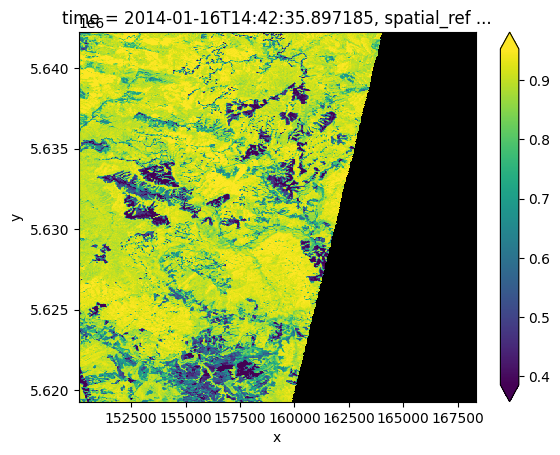

In [13]:
fig, ax = plt.subplots(1, 1)
ndvi.isel(time=1).plot(robust=True)
ax.set_facecolor("black")

## Test de hipótesis

La idea es revisar si es que hay cambios significativos en el NDVI de las zonas que hemos estado trabajando. Es un ejercicio simplificado, pero perfectamente aplicable. Podríamos contruir una hipótesis de la forma:

$$
\begin{aligned}
\text{hipótesis nula } (H_0) &: \text{no hubieron cambios,} \\
\text{hipótesis alternativa } (H_1) &: \text{hubieron algunos cambios.}
\end{aligned}
$$

### Selección de muestras

In [19]:
t0_date = np.datetime64('2014-12-31')
t1_date = np.datetime64('2022-12-31')
t0 = ndvi.time.dt.year == t0_date.astype(object).year
t1 = ndvi.time.dt.year == t1_date.astype(object).year

t0_sample = ndvi.sel(time = t0)
t1_sample = ndvi.sel(time = t1)

In [21]:
print(f"Observaciones de base: {len(t0_sample.time)}")
print(f"Observaciones posteriores: {len(t1_sample.time)}")

Observaciones de base: 38
Observaciones posteriores: 37


In [22]:
sample_lat_coords = ndvi.coords['y']
sample_lon_coords = ndvi.coords['x']

### Test para verificar el cambio

Para buscar evidencia de que el NDVI promedio ha cambiado entre las dos muestras (ya sea positiva o negativamente), usamos la *prueba t* de Welch. Esto se usa para probar la hipótesis de que dos poblaciones tienen promedios iguales. En este caso, las poblaciones son el área de interés antes y después de las fechas de referencia, y el promedio que se prueba es el NDVI en ambos rangos. Se usa la *prueba t* de Welch (a diferencia de la prueba t de Student) porque las dos muestras en el estudio pueden no tener necesariamente varianzas iguales.

La prueba se ejecuta utilizando la biblioteca de estadísticas del paquete Scipy, que proporciona la función `ttest_ind` para ejecutar pruebas t. Establecer `equal_var=False` significa que la función ejecutará la *prueba t* de Welch. La función devuelve el *estadístico t* y el valor p para cada píxel después de probar la diferencia en el NDVI promedio. Estos se almacenan como `t_stat` y `p_val` dentro del conjunto de datos `t_test` para su uso en la siguiente sección

In [24]:
from scipy import stats

tstat, p_tstat = stats.ttest_ind(
    t1_sample.values,
    t0_sample.values,
    equal_var=False,
    nan_policy='omit',
)

/env/lib/python3.8/site-packages/rasterio/warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


In [26]:
# Convert results to an xarray for further analysis
t_test = xr.Dataset(
    {
        't_stat': (['y', 'x'], tstat),
        'p_val': (['y', 'x'], p_tstat)
    },
    coords={
        'x': (['x'], sample_lon_coords.values),
        'y': (['y'], sample_lat_coords.values)
    }, 
    attrs={
        'crs': 'EPSG:32719',
    })

t_test

<xarray.Dataset>
Dimensions:  (y: 766, x: 608)
Coordinates:
  * x        (x) float64 1.501e+05 1.501e+05 1.502e+05 ... 1.683e+05 1.683e+05
  * y        (y) float64 5.642e+06 5.642e+06 5.642e+06 ... 5.619e+06 5.619e+06
Data variables:
    t_stat   (y, x) float64 2.064 8.958 6.955 8.403 ... 0.3973 0.06495 -1.298
    p_val    (y, x) float64 0.04795 1.866e-10 3.24e-08 ... 0.6981 0.9491 0.2185
Attributes:
    crs:      EPSG:32719

## Visualizar el cambio

De la prueba, nos interesan dos condiciones: si el cambio es significativo (rechazo de la hipótesis nula) y si el cambio fue positivo (forestación) o negativo (deforestación).

La hipótesis nula se puede rechazar si el *valor-p* (`p_val`) es menor que el nivel de significación elegido, que se establece como `sig_level = 0.05` (que es lo habitual) para este análisis. Si se rechaza la hipótesis nula, el píxel se clasificará como que ha sufrido un cambio significativo (si `p_val < 0.05`).

La dirección del cambio se puede deducir de la diferencia en el NDVI promedio de cada muestra, que se calcula como:

$$
\text{diferencia en la media} = \text{promedio(t0)} - \text{promedio(t1)}
$$

Esto significa que:

* si el NDVI promedio para un píxel determinado es más **alto** en `t1` en comparación con `t0`, entonces `diff_mean` para ese píxel será **positivo**.
* si el NDVI promedio para un píxel dado es más **bajo** en `t1` en comparación con `t0`, entonces `diff_mean` para ese píxel será **negativo**.

Al ejecutar las siguientes celdas, **el cambio positivo se muestra en azul (forestación) y el cambio negativo en rojo (deforestación).**

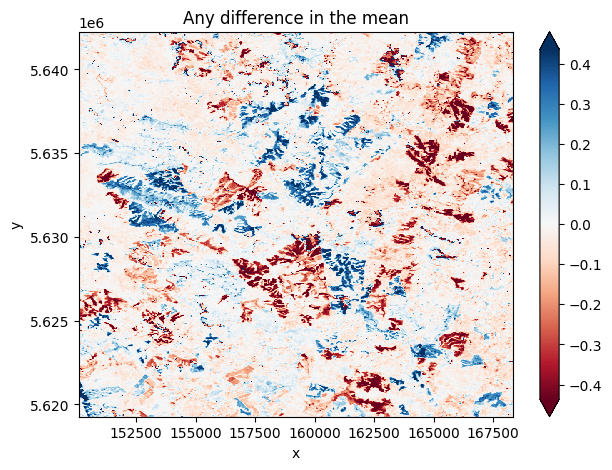

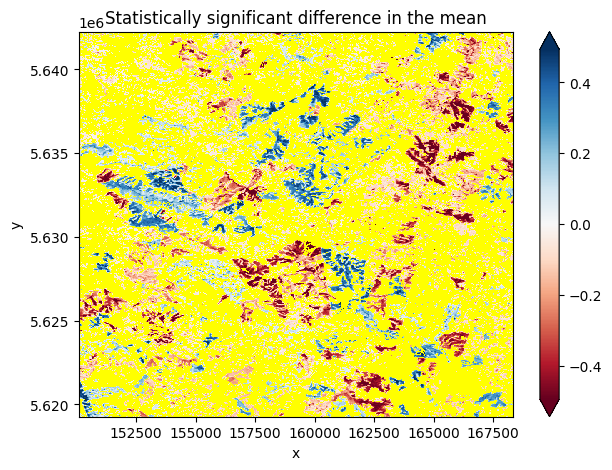

In [33]:
# Set the significance level
sig_level = 0.05

# Plot any difference in the mean
diff_mean = t1_sample.mean(dim=['time']) - t0_sample.mean(dim=['time'])

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
diff_mean.plot(cmap='RdBu', robust=True)
ax.set_title('Any difference in the mean')
plt.show()

# Plot any difference in the mean classified as significant
sig_diff_mean = t1_sample.mean(dim=['time']).where(t_test.p_val < sig_level) - t0_sample.mean(dim=['time']).where(t_test.p_val < sig_level)

fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sig_diff_mean.plot(cmap='RdBu', robust=True)
ax.set_title('Statistically significant difference in the mean')
ax.set_facecolor("yellow")
plt.show()

### Exportar resultados

Exporta como una imagen los resultados significativos encontrados en este análisis.